<a href="https://colab.research.google.com/github/EngRenan/Linear_Regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear

Regressão linear é um método estatístico que permite estimar a relação entre uma variável dependente (y) e uma ou mais variáveis independentes (x). Ele é utilizado para prever valores futuros para a variável dependente, com base em valores conhecidos das variáveis independentes. O codigo abaixo visa prever o custo de diária de um imovel baseado no numero de pessoas

In [1]:
# Importando bibliotecas
import pandas as pd # Manipulação de tabelas
import plotly.express as px # Gerar graficos dinamocos
import seaborn as sns # gráficos
import numpy as np # funções matematicas

In [4]:
# Abrindo arquivo com os dados utilizados na regressão
base_custo_diaria = pd.read_csv('base_custo_diaria.csv', sep=';')

# Visualizando arquivos da base de dados
base_custo_diaria.head

<bound method NDFrame.head of     qtd_pessoas  valor_diaria
0             1           150
1             4           385
2             6           499
3            10           680
4            13           735
5            15           859
6            18           989
7            22          1075
8            25          1500
9            30          1850
10           40          2000
11           42          2089
12           45          2250
13           47          2488
14           50          2680>

In [5]:
# Algumas estatisticas da base de dados
base_custo_diaria.describe()

,qtd_pessoas,valor_diaria
count,15.000000,15.000000
mean,24.533333,1348.600000
std,16.796542,823.087116
min,1.000000,150.000000
25%,11.500000,707.500000
50%,22.000000,1075.000000
75%,41.000000,2044.500000
max,50.000000,2680.000000


**Criando variavel que sera utilizada no modelo**

In [6]:
# Criando variavel independente
x_custo_diaria = base_custo_diaria.iloc[:,0].values # Buscando todos registros da primeira coluna e convertendo no formato array. O comando iloc permite selecionar um conjunto de registros e ":" significa que selecionará todos os registros e zero "0" a primeira coluna
x_custo_diaria

array([ 1,  4,  6, 10, 13, 15, 18, 22, 25, 30, 40, 42, 45, 47, 50])

In [7]:
# Criando variavel dependente (o que iremos predizer)
y_custo_diaria = base_custo_diaria.iloc[:,1].values
y_custo_diaria

array([ 150,  385,  499,  680,  735,  859,  989, 1075, 1500, 1850, 2000,
       2089, 2250, 2488, 2680])

In [8]:
np.corrcoef(x_custo_diaria,y_custo_diaria) # Mostra uma matriz

array([[1.        , 0.99206905],
       [0.99206905, 1.        ]])

# Correlação

Correlação positiva: quando dias variaveis que possuem correlação crescem ou decrescem juntas, ou seja, que possuem uma relação direta;

Correlação negativa: quando duas variaveis que possuem correlação mas quando uma variavel cresce a outra decresce, ou vice-versa;

Não ter correlação: quando o crescimento ou decrescimento de uma variavel nao tem efeito sobre outra variavel. 

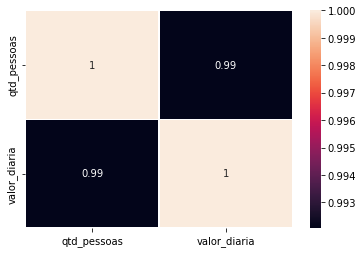

In [9]:
correlation = base_custo_diaria.corr()

# Plotando matriz da correlação
plot = sns.heatmap(correlation, annot=True, linewidths=.3)
plot

Visualizado que tem uma forte correlçao positiva, pois a medida que a quantidade de pessoas aumentam, o preço da diária tambem aumenta. Além disso, da pra dizer que 99% do valor cobrado pelas diárias pode ser explicado pela quantidade de pessoas alugando o imovel.

# Tratamento dos dados para Modelo

Será realizado transformações nos dados, no qual deve ser feito para que os dados possam ter formato que o algoritmo solicitado seja como entrada.

In [10]:
# Visualizar o formato da variavel
x_custo_diaria.shape

(15,)

In [11]:
# Visualizando variavel
x_custo_diaria # Mostra que temos uma array com apenas uma coluna/dimensão. No entanto, é preciso ter uma matriz com 2 colunas. 

array([ 1,  4,  6, 10, 13, 15, 18, 22, 25, 30, 40, 42, 45, 47, 50])

In [12]:
x_custo_diaria = x_custo_diaria.reshape(-1,1)
x_custo_diaria

array([[ 1],
       [ 4],
       [ 6],
       [10],
       [13],
       [15],
       [18],
       [22],
       [25],
       [30],
       [40],
       [42],
       [45],
       [47],
       [50]])

In [13]:
# Agora tem matriz com duas colunas, 10 linhas e uma coluna
x_custo_diaria.shape

(15, 1)

# Aplicando os dados no algoritmo de machine de regressão

In [15]:
from sklearn.linear_model import LinearRegression

# Cria um objeto do tipo regressão linear
previsao_custo_diaria = LinearRegression()

type(previsao_custo_diaria)

sklearn.linear_model._base.LinearRegression

# Realizando o tratamento no modelo

In [18]:
previsao_custo_diaria.fit(x_custo_diaria, y_custo_diaria)

LinearRegression()

In [19]:
# Verificando interceptação
previsao_custo_diaria.intercept_

155.91874556932066

In [20]:
# Verificando o coeficiente angular da reta
previsao_custo_diaria.coef_

array([48.61472504])

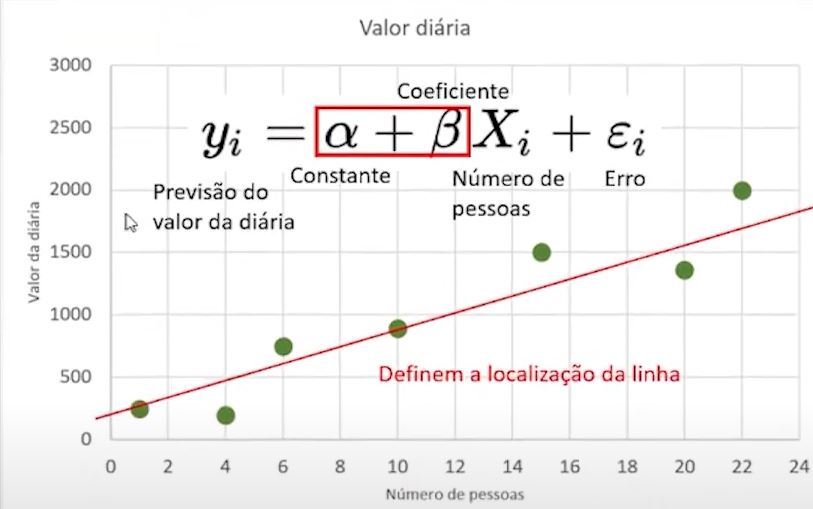

In [22]:
previsao_precos = previsao_custo_diaria.predict(x_custo_diaria) # Baseado nos valores de nº de pessoas, será estimado/previsto o custo do imovel alugado. 
previsao_precos

array([ 204.53347061,  350.37764575,  447.60709584,  642.06599602,
        787.91017115,  885.13962124, 1030.98379637, 1225.44269655,
       1371.28687169, 1614.36049691, 2100.50774736, 2197.73719745,
       2343.58137258, 2440.81082267, 2586.65499781])

# Visualizando no gráfico as disposições dos dados

Para visualizar os dados no grafico, temos que transformar os valores das variaveis para o formato de vetor, utilizando o comando ravel()

In [23]:
# Verificando o tipo da variavel x_custo_diaria
x_custo_diaria

array([[ 1],
       [ 4],
       [ 6],
       [10],
       [13],
       [15],
       [18],
       [22],
       [25],
       [30],
       [40],
       [42],
       [45],
       [47],
       [50]])

In [24]:
# Transformando em vetor
x_custo_diaria.ravel()

array([ 1,  4,  6, 10, 13, 15, 18, 22, 25, 30, 40, 42, 45, 47, 50])

In [25]:
y_custo_diaria

array([ 150,  385,  499,  680,  735,  859,  989, 1075, 1500, 1850, 2000,
       2089, 2250, 2488, 2680])

In [29]:
# Grafico
grafico = px.scatter(x = x_custo_diaria.ravel(), 
                     y = y_custo_diaria)

grafico.show()

In [30]:
grafico = px.scatter(x = x_custo_diaria.ravel(),
                     y = y_custo_diaria)

grafico.add_scatter(x = x_custo_diaria.ravel(),
                    y = previsao_precos,
                    name = 'previsões')
grafico.show()

In [33]:
# Verificando os valores de uma determinada previsão baseada na quantidade de pessoas. 
qtd_pessoas = 4
previsao_custo_diaria.intercept_ + previsao_custo_diaria.coef_ * qtd_pessoas

array([350.37764575])

In [34]:
qtd_pessoas = 8
previsao_custo_diaria.intercept_ + previsao_custo_diaria.coef_ * qtd_pessoas

array([544.83654593])

In [35]:
# Verificando de modo direto
previsao_custo_diaria.predict([[42]])

array([2197.73719745])

In [36]:
# Indicando qualidade do algoritmo. (Quanto mais proximo de 1, melhor a qualidade do modelo)
previsao_custo_diaria.score(x_custo_diaria, y_custo_diaria)

0.984200996064679

In [38]:
# Visualizando erros do modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE = mean_squared_error(y_custo_diaria, previsao_precos)

MSE

9989.829839426571

In [39]:
# Calculando MAE
mean_absolute_error(y_custo_diaria, previsao_precos)

83.84480977618742

In [40]:
# Calculando RMSE
np.sqrt(MSE)

99.9491362615334